# Pima Indians Diabetes

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =False )
%matplotlib inline

In [83]:
import numpy as np
import pandas as pd
# represents a linear stack of layers
from keras.models import Sequential
# fully connected layer
from keras.layers import Dense
# computing the accuracy of classification predictions
from sklearn.metrics import accuracy_score
# Grey Wolf Optimizer algorithm implementation
from mealpy.swarm_based import GWO

hybrid neural network that combines a metaheuristic optimization algorithm (either Grey Wolf Optimizer or Firefly Algorithm) with a Multi-Layer Perceptron (MLP) model.

# Loading the dataset

In [84]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# To check if data contains null values

In [85]:
dataset.isnull().values.any()

False

In [86]:
# To run numerical descriptive stats for the data set
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Inference 
 - Minimum values for many variables are 0.
 - As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have been coded as zeros
 - As a next step, find out how many Zero values are included in each variable

In [87]:
# Counting cells with 0 Values for each variable and publishing the counts below
(dataset.Pregnancies == 0).sum(),(dataset.Glucose==0).sum(),(dataset.BloodPressure==0).sum(),(dataset.SkinThickness==0).sum(),(dataset.Insulin==0).sum(),(dataset.BMI==0).sum(),(dataset.DiabetesPedigreeFunction==0).sum(),(dataset.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

## Inference:
- As Zero Counts of some the variables are as high as 374 and 227, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (excl Pregnancies & Outcome)
- As a next step, we’ll drop 0 values and create a our new dataset which can be used for further analysis

In [88]:
dataset.shape 

(768, 9)

In [89]:
# Creating a dataset called 'df' from original dataset 'dataset' with excludes all rows with have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.
drop_Glu=dataset.index[dataset.Glucose == 0].tolist()
drop_BP=dataset.index[dataset.BloodPressure == 0].tolist()
drop_Skin = dataset.index[dataset.SkinThickness==0].tolist()
drop_Ins = dataset.index[dataset.Insulin==0].tolist()
drop_BMI = dataset.index[dataset.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
df=dataset.drop(dataset.index[c])

In [90]:
df.shape 

(392, 9)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


## Inference
- As in above, created a cleaned up list titled “dia” which has 392 rows of data instead of 768 from original list
- Looks like we lost nearly 50% of data but our data set is now cleaner than before
- In fact the removed values can be used for Testing during modeling. So actually we haven’t really lost them completly.

# Performing Preliminary Descriptive Stats on the Data set

In [92]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
# creating count plot with title using seaborn
#sns.countplot(x=df.Outcome,color='crimson')
#plt.title("Count Plot for Outcome")

In [94]:
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [95]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [96]:
df1 = pd.DataFrame()
df1['Outcome'] = ['Non-Diabetic','Diabetic'] # [0,1]
df1['count'] = df['Outcome'].value_counts()
df1 = df1.sort_values(by = ['count'], ascending = False )
fig = px.bar(df1, x = 'Outcome', y = 'count', 
             color = "Outcome", width = 600, 
             color_discrete_sequence = ["gold", "rgb(136,204,238)"],
             template = 'plotly_white')

fig.show()
# rgb(255,237,111)

In [97]:
# Computing the %age of diabetic and non-diabetic in the sample
len_1=len(df[df.Outcome==1])
len_0=len(df[df.Outcome==0])
Total=len_0+len_1
percent_1 = len_1*100/Total
percent_0 = len_0*100/Total
print('Percentage of Diabetic = ',round(percent_1,2))
print('Percentage of Non-Diabetic = ',round(percent_0,2))

Percentage of Diabetic =  33.16
Percentage of Non-Diabetic =  66.84


# Graphical Screening for Variables
- We will take each variable, one at a time and screen them in the following manner
- Study the data distribution (histogram) of each variable – Central tendency, Spread, Distortion(Skewness & Kurtosis)
- To visually screen the association between ‘Outcome’ and each variable by plotting histograms & Boxplots by Outcome value

In [98]:
df_1 = df[df.Outcome==1]
df_0 = df[df.Outcome==0]

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_14356\1690858769.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_14356\1690858769.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_14356\1690858769.py:9: Us

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

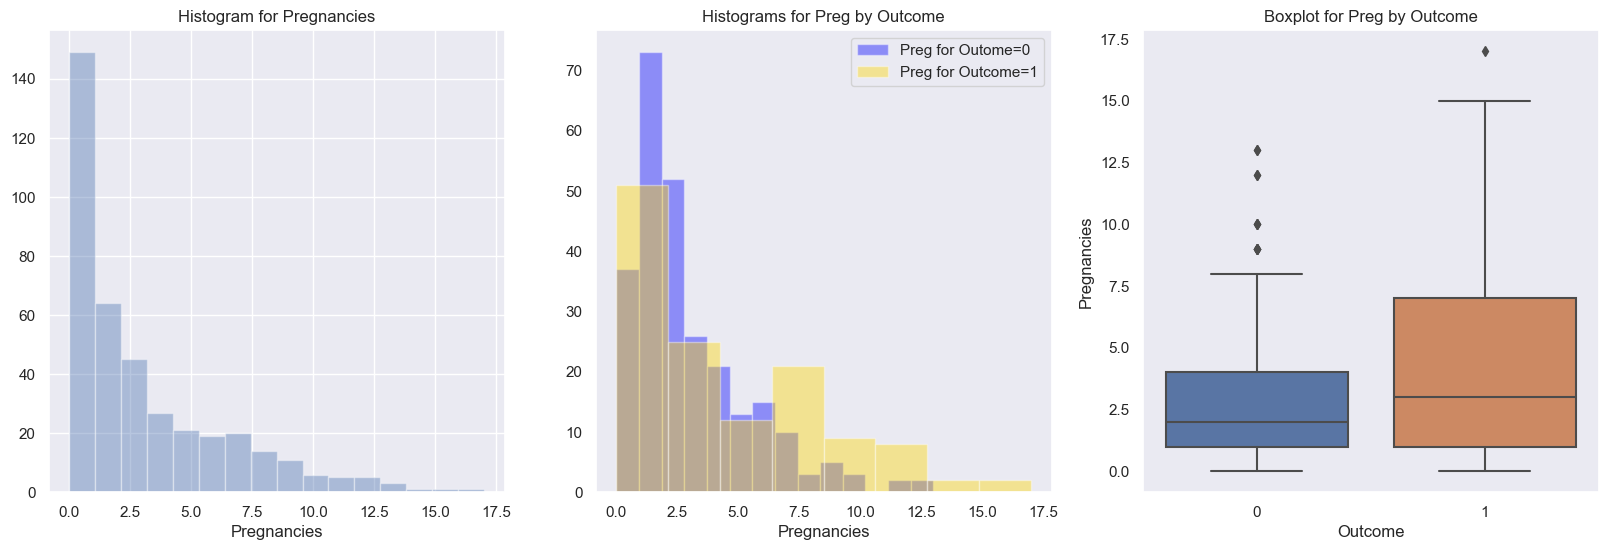

In [99]:
# Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(df.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(df_0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(df_1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

In [100]:
fig = make_subplots(rows=1, cols=2)

# Create a histogram
fig.add_trace(
    go.Histogram(
        x = df.Pregnancies,
        xbins=go.histogram.XBins(size=1), # Change the bin size
        marker=go.histogram.Marker(color="gold"), # Change the color
        hovertemplate="<br>".join([
            "Pregnancies: %{x}",
            "Count: %{y}"])),
        row=1, col=1
)
fig.show()


In [101]:
# Create a histogram
fig = px.histogram(df.Pregnancies, x="Pregnancies",#color="Pregnancies",
                  title="Pregnancies",
                  template = 'plotly_white',
                  log_y=True, # represent bars with log scale
                  color_discrete_sequence=['gold']) # color of histogram bars
fig.show()

In [102]:
# Create histogram
fig = go.Figure(data = [
    go.Histogram(
        x = df.Pregnancies,
        xbins=go.histogram.XBins(size=1), # Change the bin size
        marker=go.histogram.Marker(color="gold"), # Change the color
        hovertemplate="<br>".join([
            "Pregnancies: %{x}",
            "Count: %{y}"]) # Make hover text more informative
    )
  ]
)
fig.update_layout(template = 'plotly_white',title="Pregnancies")
fig.show()

In [103]:
fig = px.histogram(df, x="Pregnancies", color="Outcome",
                  title="Pregnancies by outcome",
                  template = 'plotly_white',
                  color_discrete_sequence = ["gold", "rgb(136,204,238)"])
fig.show()

In [104]:
import plotly.graph_objects as go
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create the histograms
fig = go.Figure()

# Add the histogram for Outcome 0
fig.add_trace(go.Histogram(x=df[df['Outcome'] == 0]['Pregnancies'],
                           name='Outcome 0',
                           marker=dict(color='blue')
                          ))

# Add the histogram for Outcome 1
fig.add_trace(go.Histogram(x=df[df['Outcome'] == 1]['Pregnancies'],
                           name='Outcome 1',
                           marker=dict(color='red')
                          ))

# Update the layout
fig.update_layout(
    title='Pregnancies Histogram by Outcome',
    xaxis_title='Pregnancies',
    yaxis_title='Count'
)

# Display the plot
fig.show()

In [105]:
fig = go.Figure(data = [
    go.Histogram(
        x = df.Pregnancies,
        y=df.Outcome,
        hovertemplate="<br>".join([
            "Pregnancies: %{x}",
            "Count: %{y}"]) # Make hover text more informative
    )
  ]
)
fig.update_layout(barmode='stack',template = 'plotly_white',title="Pregnancies")
fig.show()

In [106]:
fig = px.box(df, y="Pregnancies", x="Outcome", #points="all",
             color="Outcome",
             title="Pregnancies by outcome",
             template = 'plotly_white',
             color_discrete_sequence = ["gold", "rgb(136,204,238)"],
             notched=True) # used notched shape
fig.show()

In [107]:
fig= go.Figure(
    go.Box(y=df['Pregnancies'],x=df['Outcome'],notched=True,
          marker=dict(color='gold'))
)

fig.update_layout(template = 'plotly_white',
                  title="Pregnancies by Outcome",
                 yaxis_title='Pregnancies',
                 xaxis_title="Outcome")
fig.show()

In [108]:
fig = go.Figure()
fig.add_trace(go.Box(y=df[df['Outcome'] == 0]['Pregnancies'],
                     name='0',
                     notched=True,
                    marker_color = 'gold'))
fig.add_trace(go.Box(y=df[df['Outcome'] == 1]['Pregnancies'],
                   name='1',
                   notched=True,  
                   marker_color ="rgb(136,204,238)"))

fig.update_layout(template = 'plotly_white',
                  title="Pregnancies by Outcome",
                 yaxis_title='Pregnancies',
                 xaxis_title="Outcome")
fig.show()

In [109]:
import plotly.graph_objects as go
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create the box plots
fig = go.Figure()

# Add the first box trace
fig.add_trace(go.Box(x=df[df['Outcome'] == 0]['Pregnancies'],
                     y=df[df['Outcome'] == 0]['Pregnancies'],
                     name='Outcome 0',
                     marker=dict(color='blue')
                    ))

# Add the second box trace
fig.add_trace(go.Box(x=df[df['Outcome'] == 1]['Pregnancies'],
                     y=df[df['Outcome'] == 1]['Pregnancies'],
                     name='Outcome 1',
                     marker=dict(color='red')
                    ))

# Update the layout
fig.update_layout(
    title='Pregnancies Box Plot by Outcome',
    xaxis_title='Outcome',
    yaxis_title='Pregnancies'
)

# Display the plot
fig.show()

In [110]:
import plotly.express as px
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create a subplot of boxplots
fig = px.box(df, y='Glucose', x='Outcome', color='Outcome',
             labels={'Glucose': 'Glucose Level', 'Outcome': 'Outcome'},
             title='Glucose Level by Outcome')
fig.update_layout(showlegend=False)

# Display the subplot
fig.show()

In [111]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create a subplot with two rows and one column
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add the first histogram to the subplot
fig.add_trace(
    go.Histogram(x=df['Glucose'], nbinsx=20),
    row=1, col=1
)

# Add the second histogram to the subplot
fig.add_trace(
    go.Histogram(x=df['BMI'], nbinsx=20),
    row=2, col=1
)

# Add the boxplot to the subplot
fig.add_trace(
    go.Box(y=df['BloodPressure'], name='Blood Pressure'),
    row=2, col=1
)

# Update the layout
fig.update_layout(
    title='Glucose and BMI Distribution with Blood Pressure Boxplot',
    height=600,
    showlegend=False
)

# Display the subplot
fig.show()

In [112]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create a subplot with two rows and one column
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add the first histogram to the subplot
fig.add_trace(
    go.Histogram(x=df['Pregnancies'], nbinsx=10),
    row=1, col=1
)

# Add the second histogram to the subplot
fig.add_trace(
    go.Histogram(x=df['Outcome'], nbinsx=2),
    row=2, col=1
)

# Add the boxplot to the subplot
fig.add_trace(
    go.Box(y=df['Pregnancies'], name='Pregnancies'),
    row=2, col=1
)

# Update the layout
fig.update_layout(
    title='Pregnancies Distribution with Outcome Histogram and Boxplot',
    height=600,
    showlegend=False
)

# Display the subplot
fig.show()